In [1]:
import pandas as pd
import pickle
from scipy.stats import spearmanr, pearsonr, kendalltau

In [2]:
def generate_stat(metric):
    df = pd.DataFrame()
    for traj_len in [5, 15, 30]:
        for i in range(0, 50):
            with open(str(i) + '-' + str(traj_len) + '-density-r.pkl', 'rb') as f:
                unpickler = pickle.Unpickler(f)
                dict_res = unpickler.load()
                nrs = dict_res['nrs']
                fr = dict_res['fr']

                for j, metric_name in enumerate(['MME', 'MPV', 'OMME', 'OMPV', 'OMPVD']):
                    pd_dict = {}
                    pd_dict['Correlation coefficient'] = metric(fr, nrs[j])[0]
                    pd_dict['Poses'] = str(traj_len)
                    pd_dict['Metric name'] = metric_name
                    df = df.append(pd_dict, ignore_index=True)
    return df

In [3]:
df = generate_stat(pearsonr)
g = sns.catplot(
    data=df, kind='bar', x='Poses', y='Correlation coefficient', hue='Metric name', ci="sd", ax=ax
)
g.set(ylim=(0.7, 1))
g.set(title='Pearson')
g.set(xlabel='Number of poses')
# g._legend.remove()
g.savefig('synth_planes_pearson.pdf')

FileNotFoundError: [Errno 2] No such file or directory: '0-5-density-r.pkl'

/mnt/vol0/home/kornilova/map-quality/venv/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


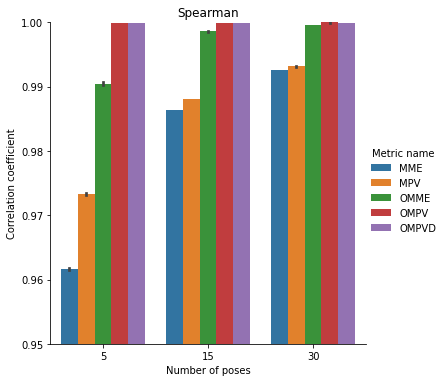

In [211]:
df = generate_stat(spearmanr)
g = sns.catplot(
    data=df, kind='bar', x='Poses', y='Correlation coefficient', hue='Metric name', ci="sd", ax=ax
)
g.set(ylim=(0.95, 1))
g.set(title='Spearman')
g.set(xlabel='Number of poses')
# g._legend.remove()
g.savefig('synth_planes_spearman.pdf')

/mnt/vol0/home/kornilova/map-quality/venv/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


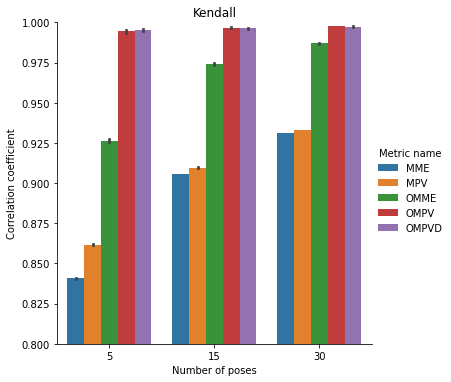

In [208]:
df = generate_stat(kendalltau)
g = sns.catplot(
    data=df, kind='bar', x='Poses', y='Correlation coefficient', hue='Metric name', ci="sd", ax=ax
)
g.set(ylim=(0.8, 1))
g.set(title='Kendall')
g.set(xlabel='Number of poses')
g.savefig('synth_planes_kendall.pdf')